In [1]:
import pandas as pd
import seaborn as sns
import glob 
import os 
import numpy as np

# Task 1: Prepare the datasets

In [2]:
def extractFiles(path): 

    all_files = glob.glob(os.path.join(path , "*.csv"))
    return all_files 

In [3]:
path = r'C:\Users\Rahul Nagarajan\Desktop\MS Project\Untitled Folder\Test_Data' 
all_files = extractFiles(path)

In [4]:
def ProcessDF(all_files):
    li = []

    for filename in all_files:
        df = pd.read_csv(filename, skiprows=1, index_col=None, header=0)
        #Epoc X has 14 channels and sampling rate of 128hz
        df = df.iloc[:, [4,5,6,7,8,9,10,11,12,13,14,15,16,17]]
        li.append(df)
    return li

In [5]:
df_list = ProcessDF(all_files)

In [6]:
for count, dataframe in enumerate(df_list):
    dataframe.to_csv(f"dataframe_{count}.csv", index=False)

In [7]:
df_path = r'C:\Users\Rahul Nagarajan\Desktop\MS Project\Untitled Folder' 

In [8]:
all_dfs = extractFiles(df_path)

# Task 2: Feature Extraction

In [9]:
import eeglib

In [10]:
#Preprocessing the data with a highpass filter of 1hz and lowpass filter of 50hz
fdfs = []
for dfs in all_dfs: 
 helper = eeglib.helpers.CSVHelper(dfs, sampleRate=128, normalize=True, highpass=1, lowpass=50)
 wrapper = eeglib.wrapper.Wrapper(helper)
 wrapper.addFeature.PFD()
 data = wrapper.getAllFeatures()
 fdfs.append(data)

In [11]:
finaldfs = []
for dfs in fdfs: 
 dfs = dfs.assign(**dfs.mean())
 dfs = dfs.head(1)
 finaldfs.append(dfs)

In [12]:
df_merged = pd.concat(finaldfs, axis=0, ignore_index=True)

In [13]:
df_merged

,PFD(){}_0,PFD(){}_1,PFD(){}_2,PFD(){}_3,PFD(){}_4,PFD(){}_5,PFD(){}_6,PFD(){}_7,PFD(){}_8,PFD(){}_9,PFD(){}_10,PFD(){}_11,PFD(){}_12,PFD(){}_13
0,1.034265,1.034688,1.034054,1.034870,1.035970,1.035939,1.035429,1.035172,1.034865,1.035038,1.035239,1.034710,1.034161,1.034258
1,1.034297,1.035565,1.035420,1.037621,1.036788,1.035257,1.034181,1.032803,1.033410,1.034871,1.036866,1.032984,1.033758,1.035295
2,1.023210,1.026737,1.023735,1.026127,1.030168,1.027421,1.024459,1.021210,1.022945,1.028143,1.026272,1.026620,1.026775,1.025487
3,1.024048,1.027517,1.024481,1.027255,1.031447,1.031520,1.026182,1.027095,1.027536,1.029599,1.029317,1.025052,1.026661,1.025090
4,1.029584,1.030885,1.029757,1.032050,1.035756,1.032672,1.028656,1.030349,1.031970,1.033685,1.033244,1.031029,1.030507,1.029594
5,1.027824,1.030331,1.027972,1.031281,1.034950,1.031178,1.029659,1.027704,1.029421,1.032155,1.031817,1.029396,1.031119,1.030421
6,1.026456,1.028372,1.025252,1.029130,1.027903,1.026527,1.021865,1.021220,1.028606,1.029428,1.028325,1.025712,1.027741,1.025584


In [14]:
df_merged.shape

(7, 14)

# Task 3: Preprocessing 

In [15]:
#Under the assumption that Vishwadeep, Cleo and Shane are the only users to be authenticated to the system. 
df_merged.loc[0:3, 'Authenticated'] = 'False'
df_merged.loc[4:6, 'Authenticated'] = 'True'

In [16]:
df_merged

,PFD(){}_0,PFD(){}_1,PFD(){}_2,PFD(){}_3,PFD(){}_4,PFD(){}_5,PFD(){}_6,PFD(){}_7,PFD(){}_8,PFD(){}_9,PFD(){}_10,PFD(){}_11,PFD(){}_12,PFD(){}_13,Authenticated
0,1.034265,1.034688,1.034054,1.034870,1.035970,1.035939,1.035429,1.035172,1.034865,1.035038,1.035239,1.034710,1.034161,1.034258,False
1,1.034297,1.035565,1.035420,1.037621,1.036788,1.035257,1.034181,1.032803,1.033410,1.034871,1.036866,1.032984,1.033758,1.035295,False
2,1.023210,1.026737,1.023735,1.026127,1.030168,1.027421,1.024459,1.021210,1.022945,1.028143,1.026272,1.026620,1.026775,1.025487,False
3,1.024048,1.027517,1.024481,1.027255,1.031447,1.031520,1.026182,1.027095,1.027536,1.029599,1.029317,1.025052,1.026661,1.025090,False
4,1.029584,1.030885,1.029757,1.032050,1.035756,1.032672,1.028656,1.030349,1.031970,1.033685,1.033244,1.031029,1.030507,1.029594,True
5,1.027824,1.030331,1.027972,1.031281,1.034950,1.031178,1.029659,1.027704,1.029421,1.032155,1.031817,1.029396,1.031119,1.030421,True
6,1.026456,1.028372,1.025252,1.029130,1.027903,1.026527,1.021865,1.021220,1.028606,1.029428,1.028325,1.025712,1.027741,1.025584,True


<AxesSubplot:xlabel='Authenticated', ylabel='count'>

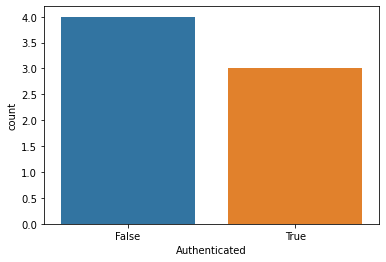

In [17]:
sns.countplot(x='Authenticated', data=df_merged)

In [18]:
labels = ({'True':1,'False':0})
df_encoded = df_merged.replace(labels)

In [19]:
df_encoded

,PFD(){}_0,PFD(){}_1,PFD(){}_2,PFD(){}_3,PFD(){}_4,PFD(){}_5,PFD(){}_6,PFD(){}_7,PFD(){}_8,PFD(){}_9,PFD(){}_10,PFD(){}_11,PFD(){}_12,PFD(){}_13,Authenticated
0,1.034265,1.034688,1.034054,1.034870,1.035970,1.035939,1.035429,1.035172,1.034865,1.035038,1.035239,1.034710,1.034161,1.034258,0
1,1.034297,1.035565,1.035420,1.037621,1.036788,1.035257,1.034181,1.032803,1.033410,1.034871,1.036866,1.032984,1.033758,1.035295,0
2,1.023210,1.026737,1.023735,1.026127,1.030168,1.027421,1.024459,1.021210,1.022945,1.028143,1.026272,1.026620,1.026775,1.025487,0
3,1.024048,1.027517,1.024481,1.027255,1.031447,1.031520,1.026182,1.027095,1.027536,1.029599,1.029317,1.025052,1.026661,1.025090,0
4,1.029584,1.030885,1.029757,1.032050,1.035756,1.032672,1.028656,1.030349,1.031970,1.033685,1.033244,1.031029,1.030507,1.029594,1
5,1.027824,1.030331,1.027972,1.031281,1.034950,1.031178,1.029659,1.027704,1.029421,1.032155,1.031817,1.029396,1.031119,1.030421,1
6,1.026456,1.028372,1.025252,1.029130,1.027903,1.026527,1.021865,1.021220,1.028606,1.029428,1.028325,1.025712,1.027741,1.025584,1


In [20]:
X = df_encoded.drop('Authenticated', axis=1).copy()
y = df_encoded['Authenticated'].copy()

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)

# Task 4: Modelling

In [33]:
import tensorflow as tf

inputs = tf.keras.Input(shape=(X_train.shape[1],))
expand_dims = tf.expand_dims(inputs, axis=2)
gru = tf.keras.layers.GRU(256, return_sequences=True)(expand_dims)
flatten = tf.keras.layers.Flatten()(gru)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(flatten)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

print(model.summary())

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 14)]              0         
                                                                 
 tf.expand_dims_4 (TFOpLambd  (None, 14, 1)            0         
 a)                                                              
                                                                 
 gru_4 (GRU)                 (None, 14, 256)           198912    
                                                                 
 flatten_4 (Flatten)         (None, 3584)              0         
                                                                 
 dense_4 (Dense)             (None, 1)                 3585      
                                                                 
Total params: 202,497
Trainable params: 202,497
Non-trainable params: 0
_____________________________________________________

In [41]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    batch_size=32,
    epochs=10,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=4,
            restore_best_weights=True
        )
    ]
)

Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 0.6957 - accuracy: 0.5000 - val_loss: 0.7113 - val_accuracy: 0.3333
Epoch 2/10
1/1 [==============================] - 0s 24ms/step - loss: 0.6945 - accuracy: 0.5000 - val_loss: 0.7153 - val_accuracy: 0.3333
Epoch 3/10
1/1 [==============================] - 0s 26ms/step - loss: 0.6950 - accuracy: 0.5000 - val_loss: 0.7022 - val_accuracy: 0.3333
Epoch 4/10
1/1 [==============================] - 0s 23ms/step - loss: 0.6935 - accuracy: 0.5000 - val_loss: 0.6882 - val_accuracy: 0.6667
Epoch 5/10
1/1 [==============================] - 0s 22ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6804 - val_accuracy: 0.6667
Epoch 6/10
1/1 [==============================] - 0s 22ms/step - loss: 0.6939 - accuracy: 0.5000 - val_loss: 0.6799 - val_accuracy: 0.6667
Epoch 7/10
1/1 [==============================] - 0s 20ms/step - loss: 0.6940 - accuracy: 0.5000 - val_loss: 0.6844 - val_accuracy: 0.6667
Epoch 8/10
1/1 [=============

# Task 5: Results 

In [42]:
model_acc = model.evaluate(X_test, y_test, verbose=0)[1]

print("Test Accuracy: {:.3f}%".format(model_acc * 100))

Test Accuracy: 66.667%
